## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/DogBreed_Classification"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'/labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
traindf = pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset



In [9]:
traindf.groupby(by='breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


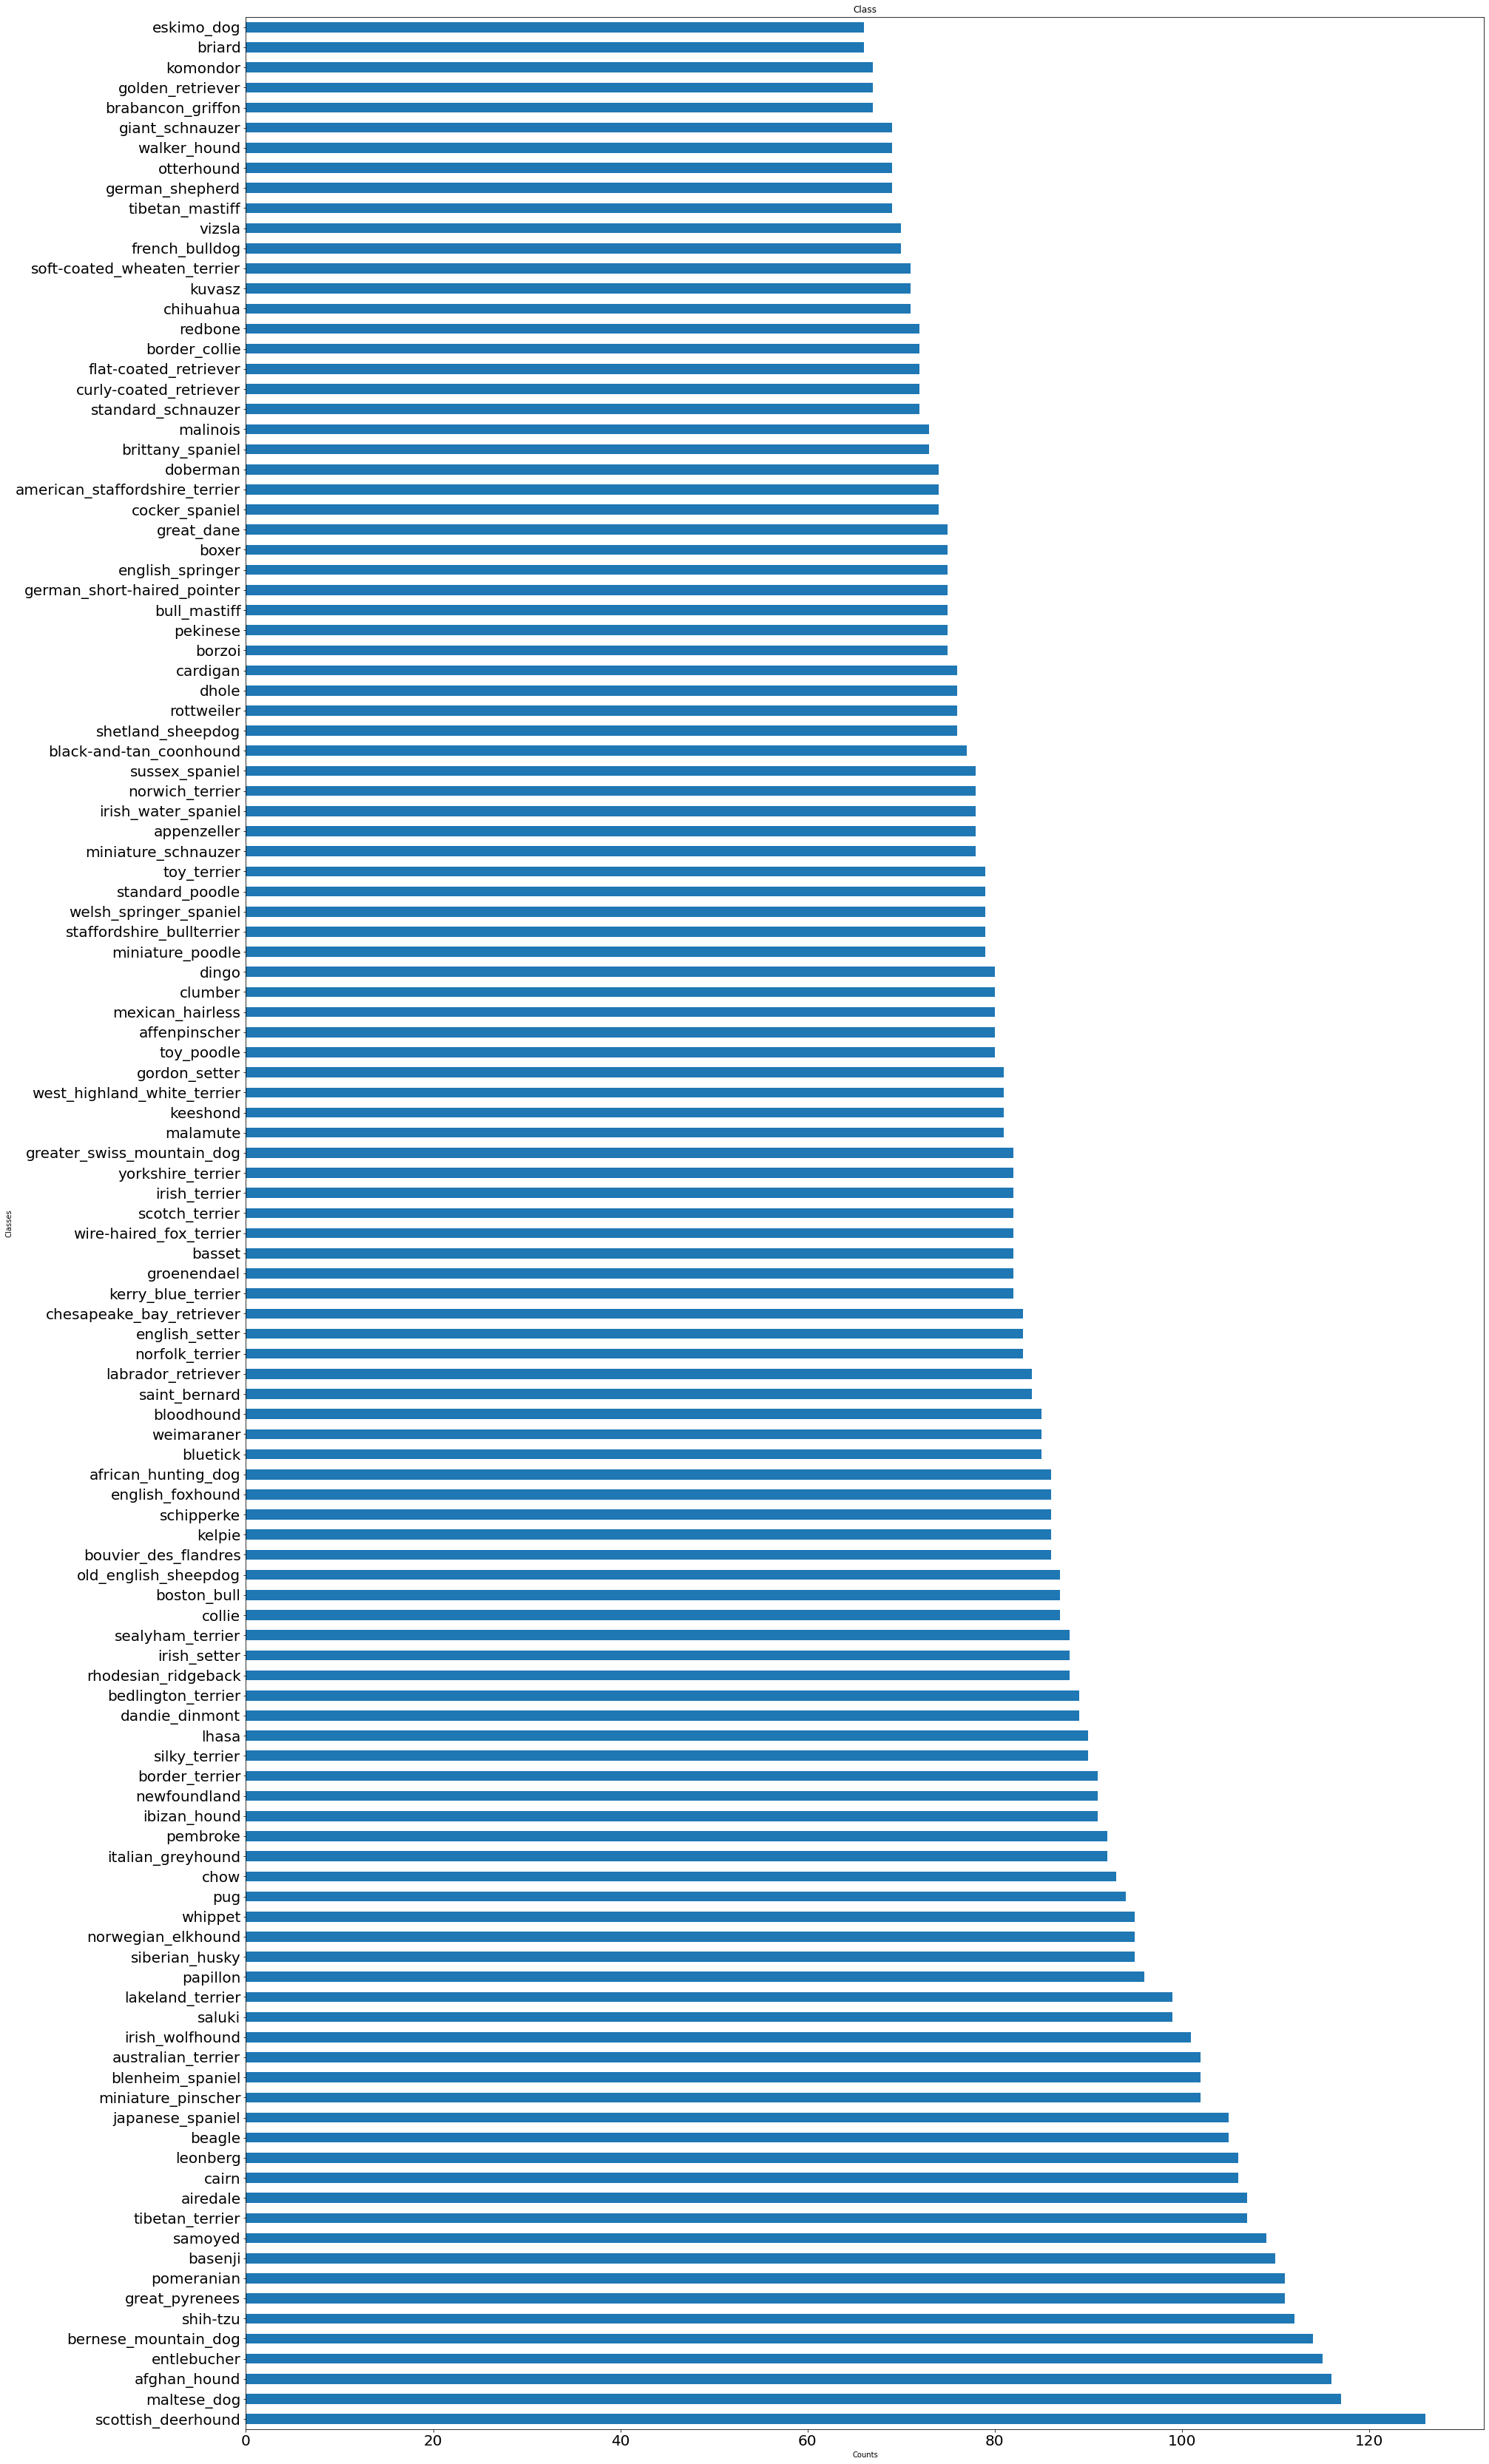

In [48]:
bar=pd.value_counts(traindf['breed']).plot(kind='barh',fontsize="20",title="Class",figsize=(30,60))
bar.set(xlabel="Counts", ylabel="Classes")
plt.show()

### Get one-hot encodings of labels

In [0]:
labels_en_df = pd.get_dummies(traindf.breed)

In [11]:
labels_en_df.head(10)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

In [14]:
for f, img in tqdm(traindf.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:26<00:00, 385.04it/s]


In [15]:
y_train[22]

'otterhound'

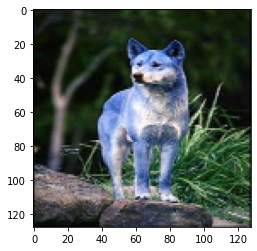

In [16]:
plt.imshow(x_train[24])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train_conv = np.array(x_train)

In [18]:
x_train_conv.shape

(10222, 128, 128, 3)

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255

In [0]:
y_train_class = pd.get_dummies(y_train)

In [21]:
y_train_class.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=1)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv('sample_submission.csv')

In [24]:
test_img.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [25]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:26<00:00, 393.78it/s]


Normalize the test data and convert it into 4 dimensions

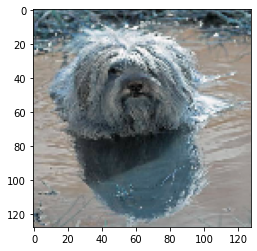

In [26]:
plt.imshow(x_test_feature[10])

In [0]:
x_test_conv = np.array(x_test_feature)

In [28]:
x_test_conv.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dense(120, activation='softmax'))

In [31]:
model_conv.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [33]:
output_conv = model_conv.fit(X_train, y_train, batch_size=128, epochs=10,validation_data=(X_val, y_val))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 8s 1ms/step - loss: 4.7926 - accuracy: 0.0061 - val_loss: 4.7916 - val_accuracy: 0.0085
Epoch 2/10
7155/7155 [==============================] - 2s 273us/step - loss: 4.7859 - accuracy: 0.0078 - val_loss: 4.7895 - val_accuracy: 0.0101
Epoch 3/10
7155/7155 [==============================] - 2s 274us/step - loss: 4.7820 - accuracy: 0.0098 - val_loss: 4.7882 - val_accuracy: 0.0104
Epoch 4/10
7155/7155 [==============================] - 2s 274us/step - loss: 4.7788 - accuracy: 0.0102 - val_loss: 4.7871 - val_accuracy: 0.0114
Epoch 5/10
7155/7155 [==============================] - 2s 277us/step - loss: 4.7756 - accuracy: 0.0137 - val_loss: 4.7856 - val_accuracy: 0.0108
Epoch 6/10
7155/7155 [==============================] - 2s 280us/step - loss: 4.7724 - accuracy: 0.0144 - val_loss: 4.7839 - val_accuracy: 0.0114
Epoch 7/10
7155/7155 [==============================] - 2s 280us/step - loss: 

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [0]:

data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)


In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [38]:
output_imggen = model_conv.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 1, steps_per_epoch=20, validation_steps=80)


Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 4.7842 - accuracy: 0.0180 - val_loss: 4.7824 - val_accuracy: 0.0119
Epoch 2/10
20/20 [==============================] - 39s 2s/step - loss: 4.7763 - accuracy: 0.0156 - val_loss: 4.7806 - val_accuracy: 0.0131
Epoch 3/10
20/20 [==============================] - 39s 2s/step - loss: 4.7619 - accuracy: 0.0145 - val_loss: 4.7762 - val_accuracy: 0.0126
Epoch 4/10
20/20 [==============================] - 39s 2s/step - loss: 4.7496 - accuracy: 0.0157 - val_loss: 4.7537 - val_accuracy: 0.0132
Epoch 5/10
20/20 [==============================] - 39s 2s/step - loss: 4.7563 - accuracy: 0.0125 - val_loss: 4.7419 - val_accuracy: 0.0125
Epoch 6/10
20/20 [==============================] - 39s 2s/step - loss: 4.7422 - accuracy: 0.0203 - val_loss: 4.7232 - val_accuracy: 0.0126
Epoch 7/10
20/20 [==============================] - 39s 2s/step - loss: 4.7468 - accuracy: 0.0148 - val_loss: 4.7866 - val_accuracy: 0.0121
Epoch 8/10
20/20 [==

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model= VGG16(weights=('/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False,input_shape=(img_rows,img_cols,3))

In [0]:
x = base_model.output

Print the summary of the base_model

In [41]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [42]:
x

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 4, 4, 512) dtype=float32>

In [0]:
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(120, activation='softmax')(x)

In [44]:
from keras.models import Model
custom_model = Model(input=base_model.input, output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
for layer in custom_model.layers[:7]:
    layer.trainable = False
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])

In [52]:
custom_model.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 1,  steps_per_epoch=128)

Epoch 1/10
128/128 [==============================] - 74s 578ms/step - loss: 4.7586 - accuracy: 0.0152 - val_loss: 4.5765 - val_accuracy: 0.0368
Epoch 2/10
128/128 [==============================] - 67s 526ms/step - loss: 4.3858 - accuracy: 0.0630 - val_loss: 4.2129 - val_accuracy: 0.0730
Epoch 3/10
128/128 [==============================] - 67s 522ms/step - loss: 3.9056 - accuracy: 0.1144 - val_loss: 3.8391 - val_accuracy: 0.1301
Epoch 4/10
128/128 [==============================] - 69s 542ms/step - loss: 3.5865 - accuracy: 0.1588 - val_loss: 3.4900 - val_accuracy: 0.1627
Epoch 5/10
128/128 [==============================] - 68s 532ms/step - loss: 3.3153 - accuracy: 0.1993 - val_loss: 3.1888 - val_accuracy: 0.2090
Epoch 6/10
128/128 [==============================] - 69s 535ms/step - loss: 3.1129 - accuracy: 0.2333 - val_loss: 4.0206 - val_accuracy: 0.1285
Epoch 7/10
128/128 [==============================] - 68s 534ms/step - loss: 2.9507 - accuracy: 0.2650 - val_loss: 3.2354 - val_ac

### Make all the layers in the base_model (VGG16) to be non-trainable

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model_1= VGG16(weights=('/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'), input_shape=(img_rows,img_cols,3),include_top=False)

In [90]:
y = base_model_1.output
y

<tf.Tensor 'block5_pool_3/MaxPool:0' shape=(None, 4, 4, 512) dtype=float32>

In [62]:
base_model_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [63]:
y = Flatten()(y)
y = Dense(1024, activation='relu')(y)
y = Dense(256, activation='relu')(y)
y = Dense(120, activation='softmax')(y)

from keras.models import Model
custom_model_vgg = Model(input=base_model_1.input, output=y)

for layer in base_model_1.layers[:7]:
    layer.trainable = False
custom_model_vgg.compile(loss='categorical_crossentropy',
                     optimizer='sgd',
                     metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [65]:
custom_model_vgg.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 1,  steps_per_epoch=128)


Epoch 1/10
128/128 [==============================] - 74s 577ms/step - loss: 4.7407 - accuracy: 0.0190 - val_loss: 4.6482 - val_accuracy: 0.0346
Epoch 2/10
128/128 [==============================] - 69s 539ms/step - loss: 4.3602 - accuracy: 0.0612 - val_loss: 3.9517 - val_accuracy: 0.0981
Epoch 3/10
128/128 [==============================] - 68s 531ms/step - loss: 3.8844 - accuracy: 0.1164 - val_loss: 3.6506 - val_accuracy: 0.1330
Epoch 4/10
128/128 [==============================] - 71s 553ms/step - loss: 3.5402 - accuracy: 0.1671 - val_loss: 3.7088 - val_accuracy: 0.1643
Epoch 5/10
128/128 [==============================] - 69s 539ms/step - loss: 3.2676 - accuracy: 0.2077 - val_loss: 3.1522 - val_accuracy: 0.2256
Epoch 6/10
128/128 [==============================] - 69s 537ms/step - loss: 3.0780 - accuracy: 0.2423 - val_loss: 3.2727 - val_accuracy: 0.1878
Epoch 7/10
128/128 [==============================] - 69s 537ms/step - loss: 2.9244 - accuracy: 0.2651 - val_loss: 3.2786 - val_ac

Try to get training and validation accuracy to be more than 90%

In [97]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
base_model_2= ResNet50(weights = 'imagenet', input_shape=(img_rows,img_cols,3),include_top=False)
a = base_model_2.output
base_model_2.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [99]:
a = Flatten()(a)
a = Dense(1024, activation='relu')(a)
a = Dense(256, activation='relu')(a)
a = Dense(120, activation='softmax')(a)
from keras.models import Model
custom_model_resnet = Model(input=base_model_2.input, output=a)

for layer in custom_model_resnet.layers[:7]:
    layer.trainable = False
custom_model_resnet.compile(loss='categorical_crossentropy',
                     optimizer = 'sgd',
                     metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [100]:
custom_model_resnet.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 1,  steps_per_epoch=128)

Epoch 1/10
128/128 [==============================] - 99s 770ms/step - loss: 4.5211 - accuracy: 0.0640 - val_loss: 6.0450 - val_accuracy: 0.0065
Epoch 2/10
128/128 [==============================] - 83s 648ms/step - loss: 3.2936 - accuracy: 0.2248 - val_loss: 6.7227 - val_accuracy: 0.0085
Epoch 3/10
128/128 [==============================] - 83s 647ms/step - loss: 2.6125 - accuracy: 0.3444 - val_loss: 6.7112 - val_accuracy: 0.0121
Epoch 4/10
128/128 [==============================] - 86s 675ms/step - loss: 2.2423 - accuracy: 0.4158 - val_loss: 6.1348 - val_accuracy: 0.0108
Epoch 5/10
128/128 [==============================] - 84s 656ms/step - loss: 1.9772 - accuracy: 0.4727 - val_loss: 6.7860 - val_accuracy: 0.0095
Epoch 6/10
128/128 [==============================] - 85s 663ms/step - loss: 1.7634 - accuracy: 0.5148 - val_loss: 5.6316 - val_accuracy: 0.0072
Epoch 7/10
128/128 [==============================] - 85s 666ms/step - loss: 1.5762 - accuracy: 0.5578 - val_loss: 6.1431 - val_ac